In [542]:
import numpy as np


In [543]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


In [544]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [545]:
import numpy as np

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)  # Si le fichier contient des données de types variés
list_index_wanted = np.load('list_index_wanted.npy')

# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [546]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


In [547]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [548]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


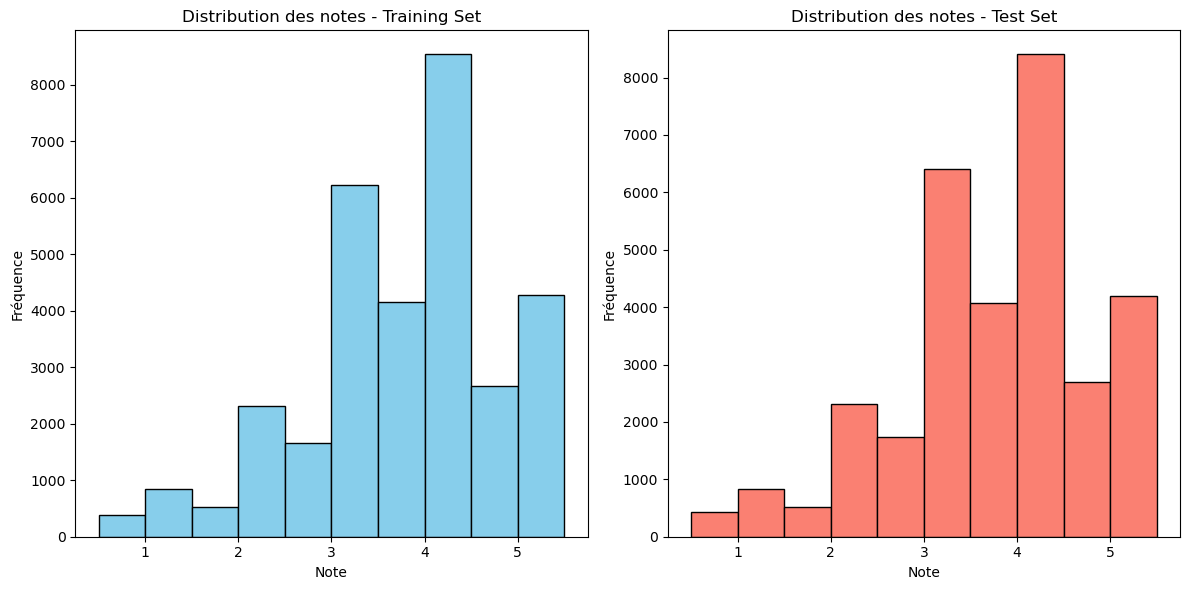

In [549]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


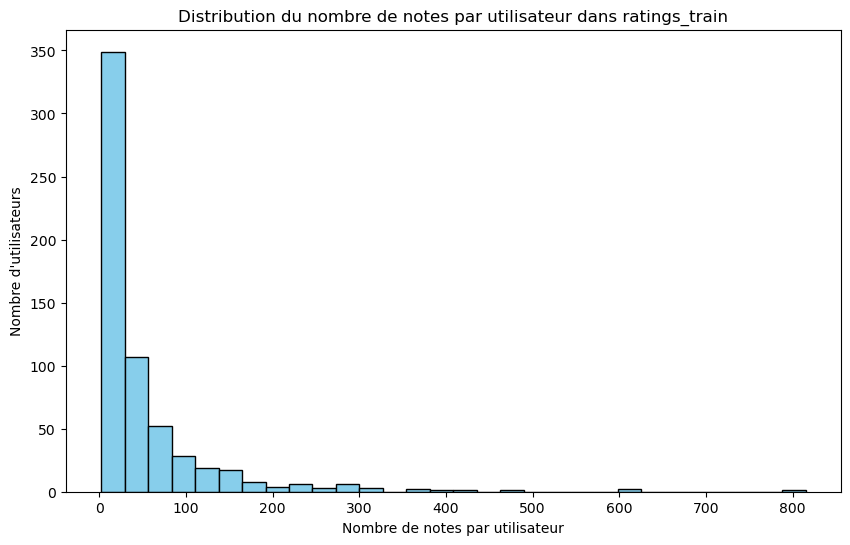

In [550]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


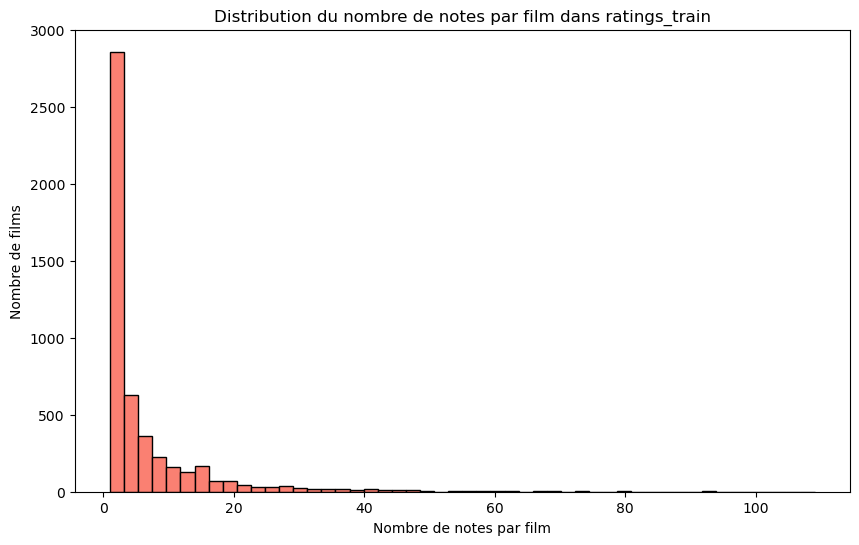

In [551]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


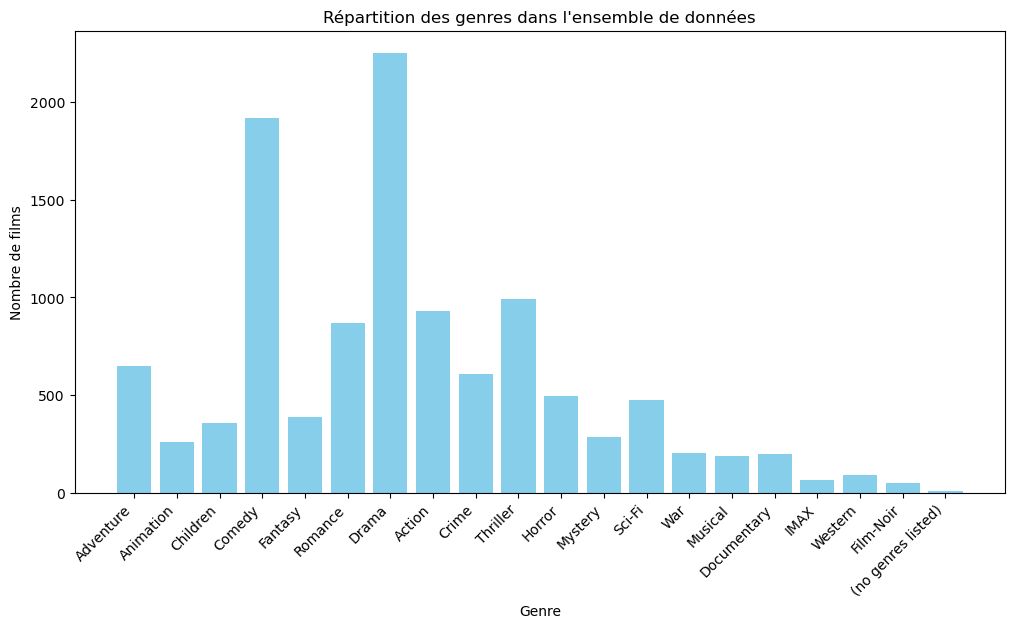

In [552]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

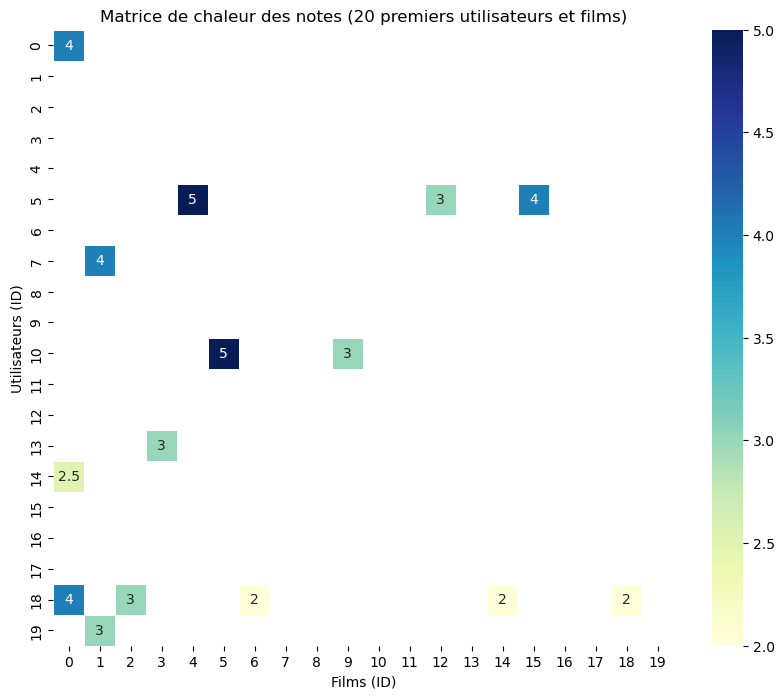

In [553]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

# Méthode SVD

In [554]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

In [555]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i,j] != 0
]

In [556]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [557]:
parameters = {"n_factors": [150, 200, 300], "reg_all": [0.01, 0.1, 0.2, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [558]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8879890038266038


In [559]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator["rmse"]

# Générer les prédictions pour les indices souhaités
predicted_ratings = []
for user_index, product_index in list_index_wanted:
    pred = best_model.predict(user_index, product_index)
    predicted_ratings.append((user_index, product_index, pred.est))

# Affichage des prédictions
for prediction in predicted_ratings:
    print(f"Utilisateur {prediction[0]}, Produit {prediction[1]}, Note prédite : {prediction[2]}")


Meilleurs paramètres : {'n_factors': 300, 'reg_all': 0.1, 'lr_all': 0.04}
Meilleur RMSE : 0.8871931838069921
Utilisateur 0, Produit 42, Note prédite : 3.194748001367577
Utilisateur 0, Produit 237, Note prédite : 3.195281714658262
Utilisateur 0, Produit 250, Note prédite : 3.5430932281036864
Utilisateur 0, Produit 261, Note prédite : 3.0697400725593464
Utilisateur 0, Produit 265, Note prédite : 3.393460609561437
Utilisateur 0, Produit 352, Note prédite : 3.6678890156235435
Utilisateur 0, Produit 372, Note prédite : 3.4272945933704957
Utilisateur 0, Produit 387, Note prédite : 3.2005578597821867
Utilisateur 0, Produit 393, Note prédite : 3.6972078809125475
Utilisateur 0, Produit 421, Note prédite : 3.7066697702577533
Utilisateur 0, Produit 475, Note prédite : 3.850905963150733
Utilisateur 0, Produit 502, Note prédite : 3.2565208680344093
Utilisateur 0, Produit 555, Note prédite : 4.046503670400508
Utilisateur 0, Produit 572, Note prédite : 4.107569502695094
Utilisateur 0, Produit 585, No

In [560]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset()


In [561]:
from surprise import Dataset, Reader, accuracy
from sklearn.metrics import r2_score
import numpy as np
from surprise.model_selection import GridSearchCV

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE (Test) :", rmse_with_mask_test)
print("R² (Test) :", r2_with_mask_test)


RMSE: 0.9094
RMSE (Test) : 0.9094076589099463
R² (Test) : 0.2306614803069661


In [562]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Générer le trainset complet pour Surprise
trainset_full = train_dataset.build_full_trainset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - Surprise) :", rmse_with_mask_train)
print("R² (Entraînement - Surprise) :", r2_with_mask_train)


RMSE: 0.8106
RMSE (Entraînement - Surprise) : 0.8105762486302598
R² (Entraînement - Surprise) : 0.3838037957442054


In [563]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test - rmse_with_mask_train}")
print(f"Différence R² (test - entraînement) : {r2_with_mask_test - r2_with_mask_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.09883141027968656
Différence R² (test - entraînement) : -0.15314231543723933


# Méthode KNN

In [564]:
# Étape 1 : Import des bibliothèques nécessaires
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [565]:
# Étape 2 : Chargement des données (en supposant que 'ratings_train_matrix' est déjà chargé)
reader = Reader(rating_scale=(1, 5))  # adapte l'échelle si nécessaire
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [566]:
# Étape 3 : Définir les paramètres de recherche pour GridSearchCV
param_grid = {
    'k': [20, 40, 60, 80, 100, 120, 140, 160],  # Essai avec différents nombres de voisins
    'min_k': [1, 3, 5, 10, 15],  # Nombre minimal de voisins
    'sim_options': {
        'name': ['cosine', 'pearson', 'pearson_baseline', 'msd'],  # Différentes mesures de similarité
        'user_based': [False]  # Basé sur les items uniquement
    }
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=10, refit=True)

# Exécuter la recherche
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params['rmse'])
print("Meilleur RMSE :", grid_search.best_score['rmse'])

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

In [567]:
# Étape 4 : Utiliser le modèle optimisé KNN pour prédire les valeurs pour l'ensemble d'entraînement
trainset_full = train_dataset.build_full_trainset()
train_predictions_knn = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement
rmse_train_knn = accuracy.rmse(train_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train_knn = np.array([pred.est for pred in train_predictions_knn])
actual_ratings_train_knn = np.array([pred.r_ui for pred in train_predictions_knn])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train_knn)
r2_train_knn = r2_score(actual_ratings_train_knn[mask_train], predicted_ratings_train_knn[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - KNN) :", rmse_train_knn)
print("R² (Entraînement - KNN) :", r2_train_knn)


RMSE: 0.4357
RMSE (Entraînement - KNN) : 0.43572341170452666
R² (Entraînement - KNN) : 0.8219454558637008


In [568]:
# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(1, 5))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions_knn = best_model.test(testset)

# Calcul du RMSE pour le jeu de test
rmse_test_knn = accuracy.rmse(test_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test_knn = np.array([pred.est for pred in test_predictions_knn])
actual_ratings_test_knn = np.array([pred.r_ui for pred in test_predictions_knn])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test_knn)
r2_test_knn = r2_score(actual_ratings_test_knn[mask_test], predicted_ratings_test_knn[mask_test])

# Affichage des résultats pour le jeu de test
print("RMSE (Test - KNN) :", rmse_test_knn)
print("R² (Test - KNN) :", r2_test_knn)


RMSE: 0.9295
RMSE (Test - KNN) : 0.9294898382412031
R² (Test - KNN) : 0.19630816739517953


In [569]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_knn - rmse_train_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_knn - r2_train_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.49376642653667646
Différence R² (test - entraînement) : -0.6256372884685213


# Auto REC

In [570]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation


In [571]:
# Paramètres de l'autoencodeur (ajustés)
input_dim = ratings_train.shape[1]
encoding_dim = 128 # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-10), loss="mean_squared_error")


In [572]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2484 - val_loss: 0.2481
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2482 - val_loss: 0.2481
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2483 - val_loss: 0.2481
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2483 - val_loss: 0.2481
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2483 - val_loss: 0.2481
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2483 - val_loss: 0.2481
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2483 - val_loss: 0.2481
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2484 - val_loss: 0.2481
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2482 - val_loss: 0.2481
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2484 - val_loss: 0.2481
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2482 - val_loss: 0.2481
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2483 - val_loss: 0.2481
E

In [573]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
mask_train = ratings_train > 0
rmse_train = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - AutoRec) :", rmse_train)

r2_train = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - AutoRec) :", r2_train)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE (Entraînement - AutoRec) : 0.29104104038182416
R² (Entraînement - AutoRec) : -0.9860023034387584


In [574]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
mask_test = ratings_test > 0
rmse_test = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - AutoRec) :", rmse_test)

r2_test = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - AutoRec) :", r2_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE (Test - AutoRec) : 0.28979156183820204
R² (Test - AutoRec) : -0.9530427169830924


In [575]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.0012494785436221179
Différence R² (test - entraînement) : 0.03295958645566599


# Deep Matrix Factorization.

In [576]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


In [577]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-5), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-5), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.3)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-5))(user_hidden)
user_hidden = Dropout(0.3)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.3)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-5))(item_hidden)
item_hidden = Dropout(0.3)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')


In [578]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [579]:
dmf_model.fit(train_data, train_ratings, epochs=100, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.0828 - val_loss: 1.5458
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1141 - val_loss: 1.3114
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9422 - val_loss: 1.2265
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8504 - val_loss: 1.1823
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8016 - val_loss: 1.1439
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7530 - val_loss: 1.2240
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7171 - val_loss: 1.1863
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6927 - val_loss: 1.1707
Epoch 9/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6718 - val_loss: 1.1797
Epoch 10/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6579 - val_loss: 1.1777
Epoch 11/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6492 - val_loss: 1.2275
Epoch 12/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [580]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train)

r2_train = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
RMSE (Entraînement - DMF) : 0.8040468527752411
R² (Entraînement - DMF) : 0.3936910438421788


In [581]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test)

r2_test = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
RMSE (Test - DMF) : 0.9348973466635997
R² (Test - DMF) : 0.18692966321720317


In [582]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.13085049388835857
Différence R² (test - entraînement) : -0.20676138062497562


# Recommandation de popularité 

In [583]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Assure-toi que NaN est remplacé par 0

# Convertir ratings_train_matrix en DataFrame pour pouvoir travailler avec
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)

# Calculer la popularité des films en fonction de la moyenne des notes
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)  # Remplace les 0 par NaN pour ne pas les compter

# Calculer le nombre de notes par chaque film (pour éviter de recommander les films peu notés)
rating_counts = user_movie_ratings_df[user_movie_ratings_df > 0].count(axis=0)

# Créer un DataFrame pour les films avec leur note moyenne et le nombre de notes
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings,
    'rating_count': rating_counts
})

# Trier les films par popularité (nombre de notes) et note moyenne
popularity_df = popularity_df.sort_values(by=['rating_count', 'average_rating'], ascending=False)

# Recommander les films les plus populaires
top_n = 10  # Nombre de films à recommander
popular_movies = popularity_df.head(top_n)

print("Films recommandés basés sur la popularité :")
print(popular_movies)


Films recommandés basés sur la popularité :
      movie_id  average_rating  rating_count
256        256        4.105505           109
227        227        4.537736           106
211        211        4.274510           102
413        413        4.161290            93
1537      1537        4.123656            93
187        187        4.261905            84
86          86        4.101266            79
339        339        3.727848            79
410        410        4.013333            75
1737      1737        4.294521            73


In [584]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Charger les données de test en remplaçant les NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# On reprend les films populaires identifiés précédemment
# Pour simplifier, on limite aux films populaires identifiés dans `popularity_df`
popular_movie_ids = popularity_df['movie_id'].head(top_n)

# Créer une liste de prédictions et de valeurs réelles
predictions = []
actuals = []


In [585]:
# Boucler sur chaque film populaire pour comparer les notes réelles et prédites
for movie_id in popular_movie_ids:
    # Récupérer la note moyenne du film (notre prédiction)
    avg_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
    
    # Récupérer les notes réelles dans l'ensemble de test
    actual_ratings = ratings_test_matrix[:, movie_id]  # Toutes les notes pour ce film dans le test
    
    # Ajouter aux listes les notes réelles (non nulles) et la prédiction correspondante
    for actual_rating in actual_ratings:
        if actual_rating > 0:  # Ignorer les notes à 0 dans les tests
            actuals.append(actual_rating)
            predictions.append(avg_rating)  # Utiliser la note moyenne comme prédiction


In [586]:
from sklearn.metrics import r2_score

# Calculer le RMSE avec un masque (en ignorant les valeurs nulles)
mask = np.array(actuals) > 0  # Masque pour les valeurs réelles non nulles
rmse_test = np.sqrt(mean_squared_error(np.array(actuals)[mask], np.array(predictions)[mask]))
print(f"RMSE (Test - Popularité) :", rmse_test)

# Calculer le R²
r2_test = r2_score(np.array(actuals)[mask], np.array(predictions)[mask])
print(f"R² (Test - Popularité) :", r2_test)


RMSE (Test - Popularité) : 0.9038392031001447
R² (Test - Popularité) : 0.004271867004418284


In [587]:
# Utiliser les notes d'entraînement pour calculer RMSE et R²
train_actuals = []
train_predictions = []

# Boucler sur chaque film populaire pour les notes d'entraînement
for movie_id in popular_movie_ids:
    # Récupérer la note moyenne du film
    avg_rating_train = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
    
    # Récupérer les notes réelles dans l'ensemble d'entraînement
    actual_ratings_train = ratings_train_matrix[:, movie_id]
    
    for actual_rating in actual_ratings_train:
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(avg_rating_train)

# Calculer le RMSE et le R² pour le jeu d'entraînement
mask_train = np.array(train_actuals) > 0
rmse_train = np.sqrt(mean_squared_error(np.array(train_actuals)[mask_train], np.array(train_predictions)[mask_train]))
print(f"RMSE (Entraînement - Popularité) :", rmse_train)

r2_train = r2_score(np.array(train_actuals)[mask_train], np.array(train_predictions)[mask_train])
print(f"R² (Entraînement - Popularité) :", r2_train)


RMSE (Entraînement - Popularité) : 0.8718820687350647
R² (Entraînement - Popularité) : 0.049833371511929125


In [588]:
# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.031957134365079964
Différence R² (test - entraînement) : -0.04556150450751084


# content-based filtering

In [589]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')

# Convertir namegenres en DataFrame
movies_df = pd.DataFrame(namegenres, columns=["title", "genre"])

# Afficher un aperçu des données
print(movies_df.head())


                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [590]:
# Vectorisation des genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genre'])

print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (4980, 23)


In [591]:
# Calcul de la similarité cosinus entre les genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Afficher un aperçu de la matrice de similarité
print("Aperçu de la matrice de similarité cosinus :\n", cosine_sim[:5, :5])


Aperçu de la matrice de similarité cosinus :
 [[1.         0.80124384 0.15371694 0.13568837 0.26483458]
 [0.80124384 1.         0.         0.         0.        ]
 [0.15371694 0.         1.         0.88271578 0.58042626]
 [0.13568837 0.         0.88271578 1.         0.51235142]
 [0.26483458 0.         0.58042626 0.51235142 1.        ]]


In [592]:
# Fonction pour obtenir des recommandations basées sur le genre d'un film
def get_recommendations(movie_index, cosine_sim=cosine_sim):
    # Similarité pour le film spécifié
    sim_scores = list(enumerate(cosine_sim[movie_index]))

    # Trier les films par score de similarité
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenir les indices des films les plus similaires
    sim_scores = sim_scores[1:6]  # Les 5 films les plus similaires
    movie_indices = [i[0] for i in sim_scores]

    # Retourner les titres des films recommandés
    return movies_df.iloc[movie_indices][['title', 'genre']]


In [593]:
# Exemple d'utilisation pour le film à l'index 0
print("Recommandations basées sur le contenu pour le film à l'index 0 :")
print(get_recommendations(0))


Recommandations basées sur le contenu pour le film à l'index 0 :
                                               title  \
1833                              Toy Story 2 (1999)   
2146  Adventures of Rocky and Bullwinkle, The (2000)   
2273                Emperor's New Groove, The (2000)   
4125                  Tale of Despereaux, The (2008)   
4633                                    Turbo (2013)   

                                            genre  
1833  Adventure|Animation|Children|Comedy|Fantasy  
2146  Adventure|Animation|Children|Comedy|Fantasy  
2273  Adventure|Animation|Children|Comedy|Fantasy  
4125  Adventure|Animation|Children|Comedy|Fantasy  
4633  Adventure|Animation|Children|Comedy|Fantasy  


In [594]:
# Hypothèse : la moyenne des notes d'entraînement comme prédiction naïve
actual_ratings_test = ratings_test[~np.isnan(ratings_test)].flatten()  # Vraies notes de l'ensemble de test
predicted_ratings_test = np.nanmean(ratings_train)  # Moyenne des notes comme prédiction

# Calcul de la RMSE entre les vraies valeurs et la prédiction moyenne
rmse_test = np.sqrt(mean_squared_error(actual_ratings_test, [predicted_ratings_test] * len(actual_ratings_test)))
print(f"RMSE pour les recommandations basées sur le contenu (test) : {rmse_test}")


RMSE pour les recommandations basées sur le contenu (test) : 1.0368918533926221


In [595]:
# Hypothèse : la moyenne des notes d'entraînement comme prédiction naïve
actual_ratings_train = ratings_train[~np.isnan(ratings_train)].flatten()  # Vraies notes de l'ensemble d'entraînement
predicted_ratings_train = np.nanmean(ratings_train)  # Moyenne des notes comme prédiction

# Calcul de la RMSE entre les vraies valeurs et la prédiction moyenne
rmse_train = np.sqrt(mean_squared_error(actual_ratings_train, [predicted_ratings_train] * len(actual_ratings_train)))
print(f"RMSE pour les recommandations basées sur le contenu (train) : {rmse_train}")


RMSE pour les recommandations basées sur le contenu (train) : 1.0326053351746378


In [596]:
from sklearn.metrics import r2_score

# Calcul du R² pour le jeu de test
mask_test = actual_ratings_test > 0  # Utiliser uniquement les valeurs réelles non nulles pour le R²
r2_test = r2_score(actual_ratings_test[mask_test], predicted_ratings_test * np.ones_like(actual_ratings_test[mask_test]))
print(f"R² pour les recommandations basées sur le contenu (test) : {r2_test}")

# Calcul du R² pour le jeu d'entraînement
mask_train = actual_ratings_train > 0  # Utiliser uniquement les valeurs réelles non nulles pour le R²
r2_train = r2_score(actual_ratings_train[mask_train], predicted_ratings_train * np.ones_like(actual_ratings_train[mask_train]))
print(f"R² pour les recommandations basées sur le contenu (train) : {r2_train}")


R² pour les recommandations basées sur le contenu (test) : -0.0001547163813668817
R² pour les recommandations basées sur le contenu (train) : 0.0


In [597]:
# Comparaison des résultats entre les jeux de test et d'entraînement
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.004286518217984314
Différence R² (test - entraînement) : -0.0001547163813668817


 # filtrage collaboratif 

In [598]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')

# Remplacer les NaN par 0 pour faciliter les calculs de similarité
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_test = np.nan_to_num(ratings_test, nan=0)


In [599]:
# Calcul de la similarité cosinus entre utilisateurs
user_similarity = cosine_similarity(ratings_train)


In [600]:
# Initialiser une matrice pour les prédictions
predicted_ratings = np.zeros(ratings_train.shape)

# Calculer les prédictions
for i in range(ratings_train.shape[0]):
    # Ne pas inclure l'utilisateur lui-même dans les similarités
    similar_users = user_similarity[i]
    similar_users[i] = 0

    # Calcul de la note prédite par pondération des notes des utilisateurs similaires
    predicted_ratings[i] = similar_users.dot(ratings_train) / (np.abs(similar_users).sum() + 1e-8)


In [601]:
# Calculer le RMSE et le R² pour le jeu d'entraînement
mask_train = ratings_train > 0
rmse_train = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings[mask_train]))
r2_train = r2_score(ratings_train[mask_train], predicted_ratings[mask_train])

print(f"RMSE (Entraînement - Filtrage Collaboratif) : {rmse_train}")
print(f"R² (Entraînement - Filtrage Collaboratif) : {r2_train}")


RMSE (Entraînement - Filtrage Collaboratif) : 3.4117140939883264
R² (Entraînement - Filtrage Collaboratif) : -9.916326835335099


In [602]:
# Calculer le RMSE et le R² pour le jeu de test
mask_test = ratings_test > 0
rmse_test = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings[mask_test]))
r2_test = r2_score(ratings_test[mask_test], predicted_ratings[mask_test])

print(f"RMSE (Test - Filtrage Collaboratif) : {rmse_test}")
print(f"R² (Test - Filtrage Collaboratif) : {r2_test}")


RMSE (Test - Filtrage Collaboratif) : 3.464614154788034
R² (Test - Filtrage Collaboratif) : -10.166318555090772


In [603]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.05290006079970766
Différence R² (test - entraînement) : -0.24999171975567336


# ALS

In [604]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')

# Remplacer les NaN par 0 pour faciliter les calculs de similarité
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_test = np.nan_to_num(ratings_test, nan=0)

# Convertir les matrices en CSR pour ALS
ratings_train_sparse = csr_matrix(ratings_train)

# Initialiser le modèle ALS
als_model = AlternatingLeastSquares(factors=10, iterations=30, regularization=0.1)

# Entraîner le modèle
als_model.fit(ratings_train_sparse)

# Prédire les notes pour le jeu d'entraînement et de test
predicted_ratings_train = als_model.user_factors @ als_model.item_factors.T
predicted_ratings_test = als_model.user_factors @ als_model.item_factors.T

# Assurer la correspondance des dimensions en utilisant la transposition
predicted_ratings_train = predicted_ratings_train[:ratings_train.shape[0], :ratings_train.shape[1]]
predicted_ratings_test = predicted_ratings_test[:ratings_test.shape[0], :ratings_test.shape[1]]

# Calcul du masque pour les valeurs non nulles
mask_train = ratings_train > 0
mask_test = ratings_test > 0

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
r2_train = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])
print(f"RMSE (Entraînement – ALS) : {rmse_train}")
print(f"R² (Entraînement – ALS) : {r2_train}")

# Calcul du RMSE et du R² pour le jeu de test
rmse_test = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
r2_test = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])
print(f"RMSE (Test – ALS) : {rmse_test}")
print(f"R² (Test – ALS) : {r2_test}")

# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")


  0%|          | 0/30 [00:00<?, ?it/s]

RMSE (Entraînement – ALS) : 3.315440804011861
R² (Entraînement – ALS) : -9.308935612335906
RMSE (Test – ALS) : 3.4518172689742146
R² (Test – ALS) : -10.083983148851422

--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.13637646496235378
Différence R² (test - entraînement) : -0.7750475365155154


# LSTM

In [605]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error, r2_score

# Exemple de données simulées (vous devez utiliser vos données réelles ici)
# Supposons que chaque utilisateur ait une séquence d'interactions
# Chaque interaction est représentée par un ID d'élément (par exemple, un ID de film)

# Données d'entraînement : chaque sous-liste représente les interactions d'un utilisateur
train_sequences = [
    [1, 3, 5, 7],  # Utilisateur 1
    [2, 3, 6],     # Utilisateur 2
    [4, 5, 8, 9],  # Utilisateur 3
    # ... (plus d'utilisateurs)
]
train_ratings = [
    [3, 4, 5, 2],  # Notes associées aux interactions de l'utilisateur 1
    [4, 3, 5],     # Utilisateur 2
    [2, 5, 4, 3],  # Utilisateur 3
    # ... (plus d'utilisateurs)
]

# Préparation des données
# Conversion des séquences en une longueur fixe avec du padding
max_sequence_length = 5  # Adapter en fonction des données
train_sequences_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
train_ratings_padded = pad_sequences(train_ratings, maxlen=max_sequence_length, padding='post')

# Paramètres du modèle
vocab_size = 10  # Nombre total d'items dans les données (à adapter selon vos données)
embedding_dim = 50  # Dimension des embeddings
lstm_units = 64  # Nombre de cellules LSTM

# Construction du modèle LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=lstm_units, return_sequences=True),
    Dropout(0.2),
    Dense(1)  # Prédiction de la note pour chaque interaction
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Entraînement du modèle
model.fit(train_sequences_padded, train_ratings_padded, epochs=10, batch_size=2)

# Prédiction sur les données de test
# (utiliser un ensemble de test réel au lieu des données d'entraînement ici)
predicted_ratings = model.predict(train_sequences_padded)

# Calcul des métriques d'évaluation (RMSE et R²)
actual_ratings = train_ratings_padded[train_ratings_padded > 0]  # Ignorer les valeurs de padding
predicted_ratings_flat = predicted_ratings[train_ratings_padded > 0]

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings_flat))
r2 = r2_score(actual_ratings, predicted_ratings_flat)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.4764  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4998
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2914
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1783
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0723
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9583
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8346
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 9.7576
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6067
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
RMSE : 3.5418382571952227
R² : -9.99926671779663


# Code pour un Autoencoder Profond


In [606]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')

# Remplacer les NaN par 0 (assurant que toutes les valeurs sont numériques)
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_test = np.nan_to_num(ratings_test, nan=0)

# Paramètres de l'autoencoder
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding pour l'autoencodeur profond
intermediate_dim1 = 256
intermediate_dim2 = 128

# Définir les couches de l'autoencoder profond
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée entre 0 et 1

# Créer le modèle d'autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss="mean_squared_error")

# Entraîner le modèle
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

# Prédictions pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)
mask_train = ratings_train > 0  # Masque pour les valeurs non-nulles
rmse_train = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
r2_train = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])

print(f"RMSE (Entraînement - Autoencoder profond) : {rmse_train}")
print(f"R² (Entraînement - Autoencoder profond) : {r2_train}")

# Prédictions pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)
mask_test = ratings_test > 0  # Masque pour les valeurs non-nulles
rmse_test = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
r2_test = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])

print(f"RMSE (Test - Autoencoder profond) : {rmse_test}")
print(f"R² (Test - Autoencoder profond) : {r2_test}")

# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test - rmse_train}")
print(f"Différence R² (test - entraînement) : {r2_test - r2_train}")


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3649 - val_loss: 0.3544
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3390 - val_loss: 0.3283
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3021 - val_loss: 0.2585
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2221 - val_loss: 0.1878
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1724 - val_loss: 0.1597
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1508 - val_loss: 0.1523
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1381 - val_loss: 0.1501
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1347 - val_loss: 0.1492
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1406 - val_loss: 0.1487
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1298 - val_loss: 0.1484
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1320 - val_loss: 0.1482
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1354 - val_l

-R2
r2_score
comparaison de rmse
utiliser suprise avec knn nombre min (sur 1) de voisins et nb max (essayer avec 10 puis 40 ou 60)voisins 



faire le calcul aussi sur le jeu de test avec le mask qui servira sur tous les modèles pour les comparer les uns avec les autres, 
le calcul sur le le jeu d'entrainement permet aussi de savoir si il y a du sur apprentissage, si remse bcp plus faible sur le jeu d'entrainement 

tester auto rec amélioré en ajoutant des couches, partie encodeur et décodeur ont actuellement une seule couche, en rajouter permettrait d'avoir un modèle un peu plus complexe  

calculer le svd avec le mask 



popularité et content based filtred méthode à part 



Deep Matrix Factorization  ajouter une couche dense pour les utilisateurs et les films en ajuter une éventuzllzment 

